**Author:** Boris Kundu

**Problem Statement:** Simple autoencoder implementation using PyTorch with hidden feature plot.

**Dataset:** Iris

In [130]:
#Import packages
import matplotlib.pyplot as plt
#!pip install torch
import torch
import torch.nn as nn
from sklearn import datasets

In [131]:
#Read data
iris = datasets.load_iris()
X = iris["data"]

In [132]:
#Define features
n = len(iris.feature_names)  # input size
m = len(X)                    # batch size
l = 2                        # hidden layer size

In [133]:
#Initialize weights
W1 = torch.randn((n,l), dtype=torch.double, requires_grad=True)
W2 = torch.randn((l,n), dtype=torch.double, requires_grad=True)

In [134]:
#Get feature tensor and loss
X = torch.tensor(X)
loss_fun = nn.MSELoss()

In [135]:
#System parameters
eta = 0.001
epochs = 7000

In [136]:
#Train model
for i in range(epochs):
    C = torch.matmul(X,W1)
    R = torch.matmul(C,W2)
    #Get MSE
    L = loss_fun(R, X)
    if(i % 100 == 0):
        print(f'Loss:{L.item()} Epoch:{i}')
    #Calculate gradients using backpropagation
    W1.grad = None
    W2.grad = None
    L.backward()
    #Update weights
    W2.data -= eta * W2.grad
    W1.data -= eta * W1.grad

Loss:59.382268434509434 Epoch:0
Loss:2.2252102824235953 Epoch:100
Loss:0.9143443156305963 Epoch:200
Loss:0.5378971697441345 Epoch:300
Loss:0.3663946042863493 Epoch:400
Loss:0.28312315680894967 Epoch:500
Loss:0.24113415042677475 Epoch:600
Loss:0.21857813402578738 Epoch:700
Loss:0.20518654398094674 Epoch:800
Loss:0.19617185558966607 Epoch:900
Loss:0.1893149008739283 Epoch:1000
Loss:0.1835845425382978 Epoch:1100
Loss:0.1784952928287547 Epoch:1200
Loss:0.1738125798952908 Epoch:1300
Loss:0.16941840781677797 Epoch:1400
Loss:0.16525002504237796 Epoch:1500
Loss:0.1612716466866917 Epoch:1600
Loss:0.1574611761253464 Epoch:1700
Loss:0.15380379942571779 Epoch:1800
Loss:0.15028878381153898 Epoch:1900
Loss:0.14690780790834793 Epoch:2000
Loss:0.14365404903939208 Epoch:2100
Loss:0.14052166013126485 Epoch:2200
Loss:0.13750545647478118 Epoch:2300
Loss:0.13460072098374962 Epoch:2400
Loss:0.13180307944361522 Epoch:2500
Loss:0.12910841876777537 Epoch:2600
Loss:0.12651283255213536 Epoch:2700
Loss:0.12401258

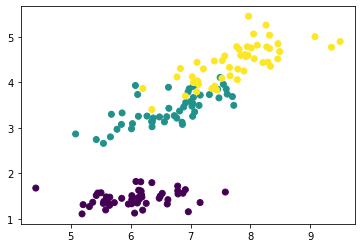

In [137]:
#Plot
C = torch.matmul(X,W1)
plt.scatter(C.data[:, 0], C.data[:, 1], c=iris["target"])
plt.show()